In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:

file_path = "/Users/anselbiju/Downloads/house_price.csv"
df = pd.read_csv(file_path)
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


(None,
                    location       size  total_sqft  bath   price  bhk  \
 0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
 1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
 2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
 3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
 4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   
 
    price_per_sqft  
 0            3699  
 1            4615  
 2            4305  
 3            6245  
 4            4250  )

In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np

In [9]:
!pip install scipy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 12.0 MB/s eta 0:00:0000:0100:01


In [10]:


# Extract the column of interest
price_per_sqft = df['price_per_sqft']

# a: Outlier detection using Mean and Standard Deviation
mean_pps = price_per_sqft.mean()
std_pps = price_per_sqft.std()
lower_limit_sd = mean_pps - 3 * std_pps
upper_limit_sd = mean_pps + 3 * std_pps
sd_filtered = df[(price_per_sqft >= lower_limit_sd) & (price_per_sqft <= upper_limit_sd)]

# b: Outlier detection using Percentile method (1st and 99th percentiles)
lower_limit_pct = price_per_sqft.quantile(0.01)
upper_limit_pct = price_per_sqft.quantile(0.99)
pct_filtered = df[(price_per_sqft >= lower_limit_pct) & (price_per_sqft <= upper_limit_pct)]

# c: IQR Method
Q1 = price_per_sqft.quantile(0.25)
Q3 = price_per_sqft.quantile(0.75)
IQR = Q3 - Q1
lower_limit_iqr = Q1 - 1.5 * IQR
upper_limit_iqr = Q3 + 1.5 * IQR
iqr_filtered = df[(price_per_sqft >= lower_limit_iqr) & (price_per_sqft <= upper_limit_iqr)]

# d: Z-Score Method
from scipy.stats import zscore
z_scores = zscore(price_per_sqft)
z_filtered = df[(np.abs(z_scores) < 3)]

# Sizes of datasets after filtering
{
    "Original": len(df),
    "Mean ± 3*SD": len(sd_filtered),
    "1st-99th Percentile": len(pct_filtered),
    "IQR Method": len(iqr_filtered),
    "Z-Score Method": len(z_filtered)
}


{'Original': 13200,
 'Mean ± 3*SD': 13195,
 '1st-99th Percentile': 12941,
 'IQR Method': 11935,
 'Z-Score Method': 13195}

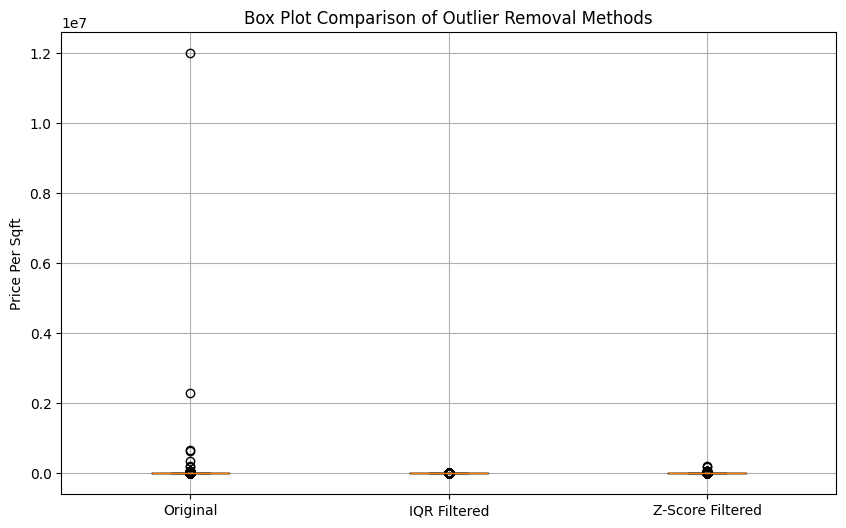

In [13]:
import matplotlib.pyplot as plt

# Box plot 
plt.figure(figsize=(10, 6))
plt.boxplot([price_per_sqft, iqr_filtered['price_per_sqft'], z_filtered['price_per_sqft']],tick_labels=['Original', 'IQR Filtered', 'Z-Score Filtered'])
plt.title('Box Plot Comparison ')
plt.ylabel('Price Per Sqft')
plt.grid(True)
plt.show()

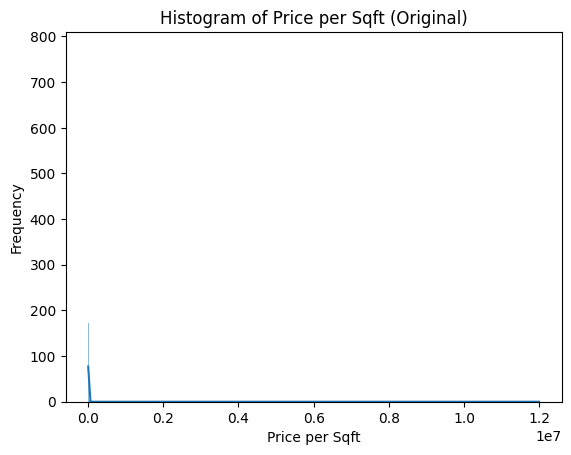

Original Skewness: 108.28105529705168
Original Kurtosis: 12095.21502832288


In [15]:
import seaborn as sns

sns.histplot(df['price_per_sqft'], kde=True)
plt.title('Histogram of Price per Sqft (Original)')
plt.xlabel('Price per Sqft')
plt.ylabel('Frequency')
plt.show()

# Skewness and Kurtosis
print("Original Skewness:", df['price_per_sqft'].skew())
print("Original Kurtosis:", df['price_per_sqft'].kurt())

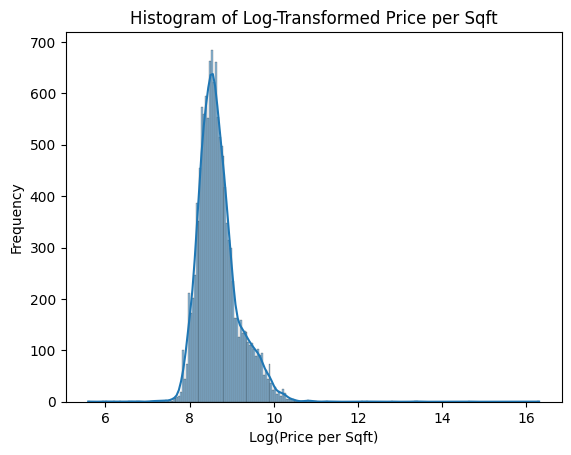

Transformed Skewness: 1.4004850530059296
Transformed Kurtosis: 9.206942162860814


In [16]:
df['log_price_per_sqft'] = np.log1p(df['price_per_sqft'])

# Plot transformed data
sns.histplot(df['log_price_per_sqft'], kde=True)
plt.title('Histogram of Log-Transformed Price per Sqft')
plt.xlabel('Log(Price per Sqft)')
plt.ylabel('Frequency')
plt.show()

# Skewness and Kurtosis after transformation
print("Transformed Skewness:", df['log_price_per_sqft'].skew())
print("Transformed Kurtosis:", df['log_price_per_sqft'].kurt())

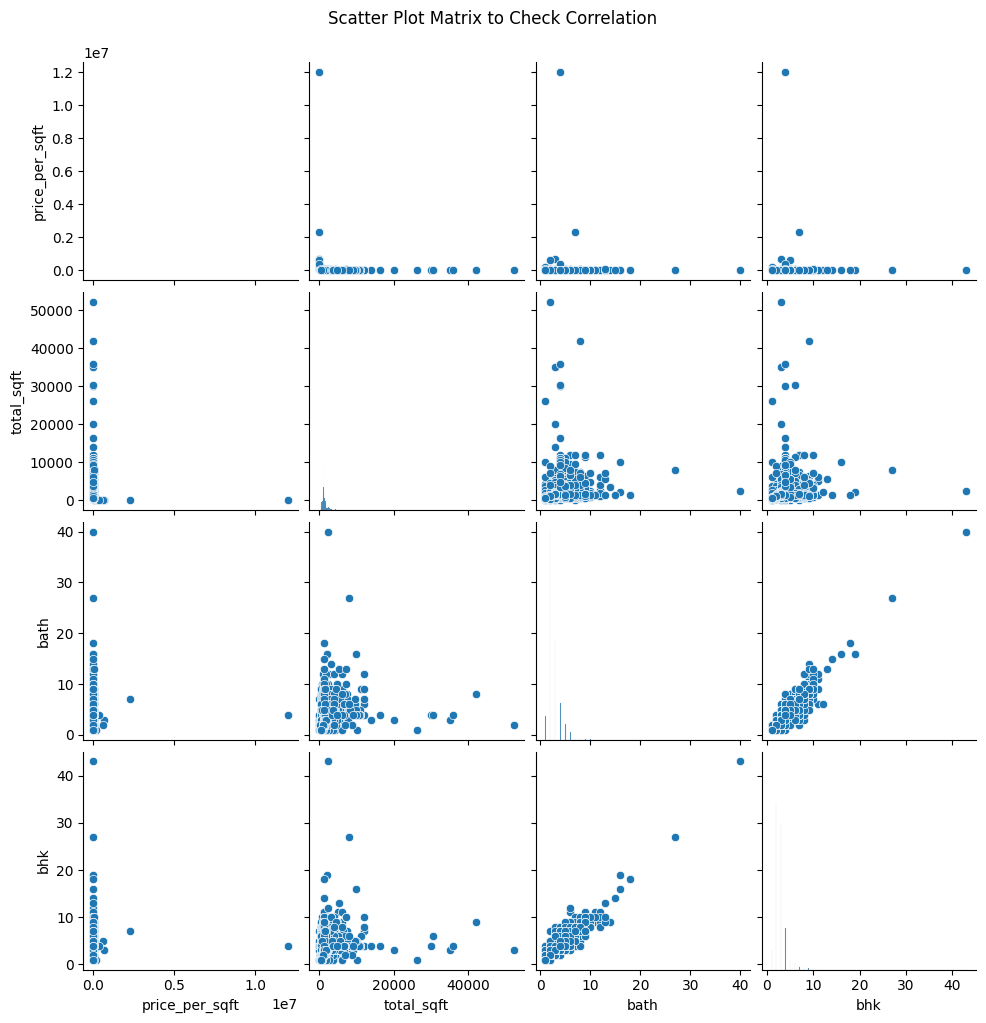

In [17]:
# Select relevant numeric columns
cols = ['price_per_sqft', 'total_sqft', 'bath', 'bhk']  # adjust as needed
sns.pairplot(df[cols])
plt.suptitle('Scatter Plot Matrix to Check Correlation', y=1.02)
plt.show()



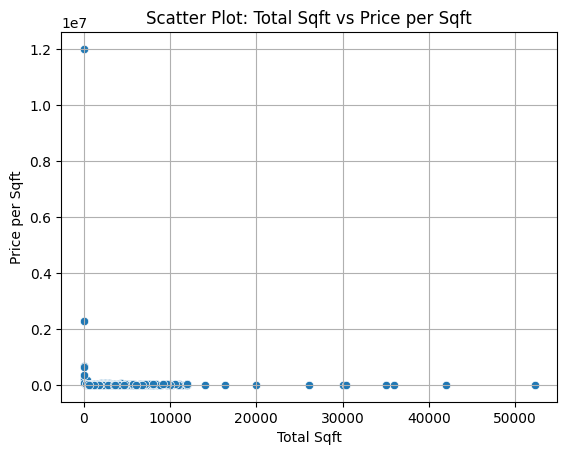

In [18]:
sns.scatterplot(data=df, x='total_sqft', y='price_per_sqft')
plt.title('Scatter Plot: Total Sqft vs Price per Sqft')
plt.xlabel('Total Sqft')
plt.ylabel('Price per Sqft')
plt.grid(True)
plt.show()

In [19]:
print(df[['price_per_sqft', 'total_sqft', 'bath', 'bhk']].corr())


                price_per_sqft  total_sqft      bath       bhk
price_per_sqft        1.000000   -0.008267  0.030883  0.030955
total_sqft           -0.008267    1.000000  0.392743  0.346013
bath                  0.030883    0.392743  1.000000  0.897951
bhk                   0.030955    0.346013  0.897951  1.000000
